1)Load the Dataset

In [1]:
import pandas as pd

# Load the red wine dataset
red_wine_data = pd.read_csv('winequality-red.csv')

# Load the white wine dataset
white_wine_data = pd.read_csv('winequality-red.csv')


2) Data preprocessing including visualization

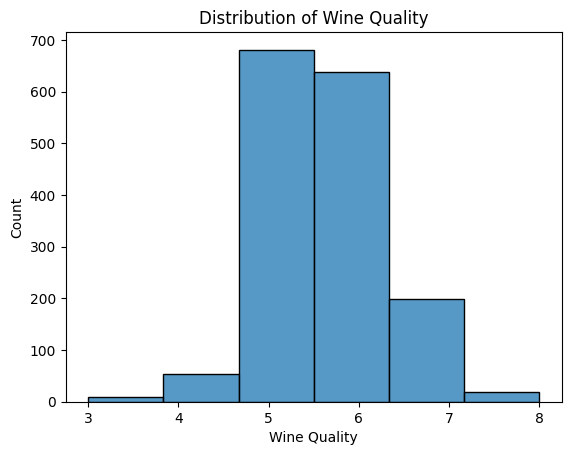

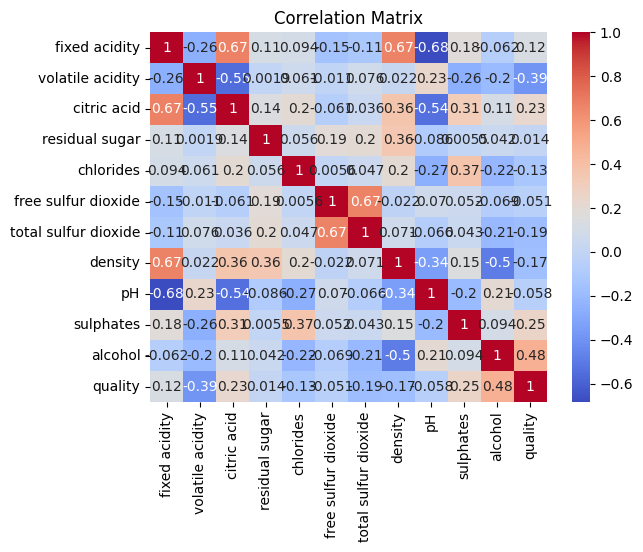

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check for missing data
red_wine_data.isnull().sum()

# Visualize data distributions
sns.histplot(red_wine_data['quality'], bins=6)
plt.xlabel('Wine Quality')
plt.ylabel('Count')
plt.title('Distribution of Wine Quality')
plt.show()

# Explore feature relationships
correlation_matrix = red_wine_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Feature scaling or normalization if required
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
red_wine_data[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
               'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
               'pH', 'sulphates', 'alcohol']] = scaler.fit_transform(red_wine_data[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
                                                                                   'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
                                                                                   'pH', 'sulphates', 'alcohol']])


3)Machine Learning Model building

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Define features and target variable
X = red_wine_data.drop('quality', axis=1)
y = red_wine_data['quality']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

4)Evaluate the model

In [4]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')


Accuracy: 0.65
Confusion Matrix:
[[ 0  0  1  0  0  0]
 [ 0  0  7  3  0  0]
 [ 0  0 96 33  1  0]
 [ 0  1 32 90  8  1]
 [ 0  0  0 19 22  1]
 [ 0  0  0  1  4  0]]
Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.71      0.74      0.72       130
           6       0.62      0.68      0.65       132
           7       0.63      0.52      0.57        42
           8       0.00      0.00      0.00         5

    accuracy                           0.65       320
   macro avg       0.33      0.32      0.32       320
weighted avg       0.62      0.65      0.64       320



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


5)Test with random observation

In [5]:
# Choose a random observation from the dataset
import random

random_index = random.randint(0, len(red_wine_data) - 1)
random_observation = red_wine_data.iloc[random_index, :-1].values.reshape(1, -1)

# Predict the wine quality for the random observation
predicted_quality = rf_classifier.predict(random_observation)

print(f'Predicted Wine Quality: {predicted_quality[0]}')


Predicted Wine Quality: 5


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
